<a href="https://colab.research.google.com/github/FariusGitHub/Learn-OpenGLES-Tutorials/blob/master/Web-Scraping-ratehub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


term year =  1 scanning completed
term year =  2 scanning completed
term year =  3 scanning completed
term year =  4 scanning completed
term year =  5 scanning completed


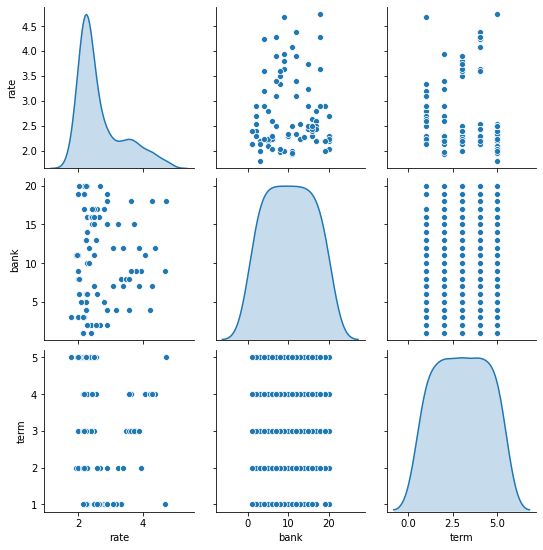

In [1]:
import requests
import bs4
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

termsandbank=[]
term = 'https://www.ratehub.ca/best-mortgage-rates/{}-year/fixed'

for x in range(1,6): #scanning 1-year term to 5-year term mortgage rates from 20 banks
    soup = bs4.BeautifulSoup(requests.get(term.format(x)).text,"lxml")
    for y in range(int(len(soup.select('.rh-provider'))/2)): #THE LIST IS TWICE LONGER (DUPLICATED)
        #DEVELOPING ARRAY OF MORTGAGE RATE, BANK NAME AND TERM
        termsandbank.append([soup.select('.rh-rate')[y].text.split()[0].split('%')[0],
                        ' '.join(soup.select('.rh-provider')[y].text.upper().split()), x 
                            ])
    print('term year = ',x, 'scanning completed') #UPDATES WHEN DOWNLOADING

banksorts=[]
for a1,a2,a3 in termsandbank: #ADDING ALL POSSIBLE BANK NAMES ONE TIME INTO BANKSORTS PRIOR TO SORT
    if a2 not in banksorts:
        banksorts.append(a2.upper())  

bankcodes=[]
banksorts.sort() #LIST OF ALL BANK IN ALPHABETICAL ORDER PRIOR TO NUMBERING
for c in range(len(banksorts)): #BANK LIST WITH BANK CODES
    bankcodes.append((banksorts[c], c+1))
    c+=1

bankdicts={}
for k, v in bankcodes: #BANK DICTIONARY 1 TO 20
    bankdicts[k] = v

for z in range(len(termsandbank)): #ALL RATES WITHIN ALL BANK FOR THE 5 TERMS WITH BANK CODES
        termsandbank[z][1] = bankdicts.get(termsandbank[z][1],"")

data=np.array(termsandbank, dtype='float') # CONVERTING LIST TO ARRAY READY FOR SEABORN DATA FRAME
df = pd.DataFrame(data, columns=["rate", "bank", "term"]) #DEVELOPING DATAFRAME FOR PAIRPLOT
sns.pairplot(df, diag_kind='kde', kind='scatter') #SIMPLE PRACTICES WITH NUMPY, PANDA, SEABORN, PYPLOT